In [221]:
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
global_static_pressure = 269
global_total_pressure = 306
density_air = 1.23
A0 = 40.5
V0 = 30.175638
global_vel = 23.51266740408847
total_pressure_settling_chamber = 368
static_pressure_at_inlet = 336

In [349]:
import math
def velocity_cal_B(pt,pi,d):
    vel = math.sqrt(2*(pt-pi)/d)
    return vel

def velocity_cal_C(A):
    vel = (A0*V0)/A
    return vel
def calculate_error(u_actual,u_calculated):
    error = ((u_calculated-u_actual)/u_actual)*100
    return abs(error)
def cal_area(A):
    return A*50/100

In [351]:
import pandas as pd 
df = pd.read_csv('Bernoulli_verify.csv')

df = df.dropna(how="all")
df['Length'] = df['Length'].astype(int)
df

,Length,Static Pressure(Pi),Total Pressure(P0),A
0,0,11--0,16--3,81.0
1,1,10--0,16--3,75.0
2,2,9--0,16--3,69.0
3,3,7--3,16--3,64.0
4,4,6--1,16--3,58.0
5,5,5--1,16--3,52.0
6,6,4--4,16--3,47.0
7,7,4--3,16--3,43.6
8,8,4--3,16--3,43.6
9,9,4--3,16--3,43.6


In [353]:
def convert_pressure(pressure_str):
    # Split the string into the main number and the "--xx" part
    main, div = pressure_str.split("--")
    main = (int(main)-11) * 100  # Convert main part to Pascals
    div = int(div) * 20  # Convert division part to Pascals
    return main+div

# Apply the function to the Static Pressure and Total Pressure columns
df["Static Pressure (Pa)"] = df["Static Pressure(Pi)"].apply(convert_pressure)
df["Total Pressure (Pa)"] = df["Total Pressure(P0)"].apply(convert_pressure)

In [355]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa)
0,0,11--0,16--3,81.0,0,560
1,1,10--0,16--3,75.0,-100,560
2,2,9--0,16--3,69.0,-200,560
3,3,7--3,16--3,64.0,-340,560
4,4,6--1,16--3,58.0,-480,560
5,5,5--1,16--3,52.0,-580,560
6,6,4--4,16--3,47.0,-620,560
7,7,4--3,16--3,43.6,-640,560
8,8,4--3,16--3,43.6,-640,560
9,9,4--3,16--3,43.6,-640,560


In [357]:
u_actual = velocity_cal_B(total_pressure_settling_chamber,static_pressure_at_inlet,density_air)

In [359]:
df['Calculated Area'] = df['A'].apply(cal_area)

In [361]:
df['Bernoulli Vel'] = df.apply(
    lambda x: velocity_cal_B(x['Total Pressure (Pa)'], x['Static Pressure (Pa)'], density_air), axis=1
)

In [363]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel
0,0,11--0,16--3,81.0,0,560,40.50,30.175638
1,1,10--0,16--3,75.0,-100,560,37.50,32.759285
2,2,9--0,16--3,69.0,-200,560,34.50,35.153554
3,3,7--3,16--3,64.0,-340,560,32.00,38.254603
4,4,6--1,16--3,58.0,-480,560,29.00,41.122462
5,5,5--1,16--3,52.0,-580,560,26.00,43.054135
6,6,4--4,16--3,47.0,-620,560,23.50,43.802959
7,7,4--3,16--3,43.6,-640,560,21.80,44.172610
8,8,4--3,16--3,43.6,-640,560,21.80,44.172610
9,9,4--3,16--3,43.6,-640,560,21.80,44.172610


In [366]:
velocity_cal_B(560,220,density_air)

23.51266740408847

In [368]:
cal_area(81)

40.5

In [370]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel
0,0,11--0,16--3,81.0,0,560,40.50,30.175638
1,1,10--0,16--3,75.0,-100,560,37.50,32.759285
2,2,9--0,16--3,69.0,-200,560,34.50,35.153554
3,3,7--3,16--3,64.0,-340,560,32.00,38.254603
4,4,6--1,16--3,58.0,-480,560,29.00,41.122462
5,5,5--1,16--3,52.0,-580,560,26.00,43.054135
6,6,4--4,16--3,47.0,-620,560,23.50,43.802959
7,7,4--3,16--3,43.6,-640,560,21.80,44.172610
8,8,4--3,16--3,43.6,-640,560,21.80,44.172610
9,9,4--3,16--3,43.6,-640,560,21.80,44.172610


In [373]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel
0,0,11--0,16--3,81.0,0,560,40.50,30.175638
1,1,10--0,16--3,75.0,-100,560,37.50,32.759285
2,2,9--0,16--3,69.0,-200,560,34.50,35.153554
3,3,7--3,16--3,64.0,-340,560,32.00,38.254603
4,4,6--1,16--3,58.0,-480,560,29.00,41.122462
5,5,5--1,16--3,52.0,-580,560,26.00,43.054135
6,6,4--4,16--3,47.0,-620,560,23.50,43.802959
7,7,4--3,16--3,43.6,-640,560,21.80,44.172610
8,8,4--3,16--3,43.6,-640,560,21.80,44.172610
9,9,4--3,16--3,43.6,-640,560,21.80,44.172610


In [375]:

df['Velocity Continuity'] = df.apply(
    lambda x: velocity_cal_C(x['Calculated Area']), axis=1
)

In [377]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel,Velocity Continuity
0,0,11--0,16--3,81.0,0,560,40.50,30.175638,30.175638
1,1,10--0,16--3,75.0,-100,560,37.50,32.759285,32.589689
2,2,9--0,16--3,69.0,-200,560,34.50,35.153554,35.423575
3,3,7--3,16--3,64.0,-340,560,32.00,38.254603,38.191042
4,4,6--1,16--3,58.0,-480,560,29.00,41.122462,42.141839
5,5,5--1,16--3,52.0,-580,560,26.00,43.054135,47.004359
6,6,4--4,16--3,47.0,-620,560,23.50,43.802959,52.004823
7,7,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245
8,8,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245
9,9,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245


In [379]:
df['Error'] = df.apply(
    lambda x : calculate_error(x['Velocity Continuity'],x['Bernoulli Vel']), axis=1
)

In [381]:
df

,Length,Static Pressure(Pi),Total Pressure(P0),A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel,Velocity Continuity,Error
0,0,11--0,16--3,81.0,0,560,40.50,30.175638,30.175638,0.000001
1,1,10--0,16--3,75.0,-100,560,37.50,32.759285,32.589689,0.520397
2,2,9--0,16--3,69.0,-200,560,34.50,35.153554,35.423575,0.762264
3,3,7--3,16--3,64.0,-340,560,32.00,38.254603,38.191042,0.166429
4,4,6--1,16--3,58.0,-480,560,29.00,41.122462,42.141839,2.418919
5,5,5--1,16--3,52.0,-580,560,26.00,43.054135,47.004359,8.403953
6,6,4--4,16--3,47.0,-620,560,23.50,43.802959,52.004823,15.771353
7,7,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245,21.205106
8,8,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245,21.205106
9,9,4--3,16--3,43.6,-640,560,21.80,44.172610,56.060245,21.205106


In [383]:
df.drop('Static Pressure(Pi)', axis=1, inplace=True) 

In [385]:
df.drop('Total Pressure(P0)', axis=1, inplace=True) 

In [387]:
df

,Length,A,Static Pressure (Pa),Total Pressure (Pa),Calculated Area,Bernoulli Vel,Velocity Continuity,Error
0,0,81.0,0,560,40.50,30.175638,30.175638,0.000001
1,1,75.0,-100,560,37.50,32.759285,32.589689,0.520397
2,2,69.0,-200,560,34.50,35.153554,35.423575,0.762264
3,3,64.0,-340,560,32.00,38.254603,38.191042,0.166429
4,4,58.0,-480,560,29.00,41.122462,42.141839,2.418919
5,5,52.0,-580,560,26.00,43.054135,47.004359,8.403953
6,6,47.0,-620,560,23.50,43.802959,52.004823,15.771353
7,7,43.6,-640,560,21.80,44.172610,56.060245,21.205106
8,8,43.6,-640,560,21.80,44.172610,56.060245,21.205106
9,9,43.6,-640,560,21.80,44.172610,56.060245,21.205106


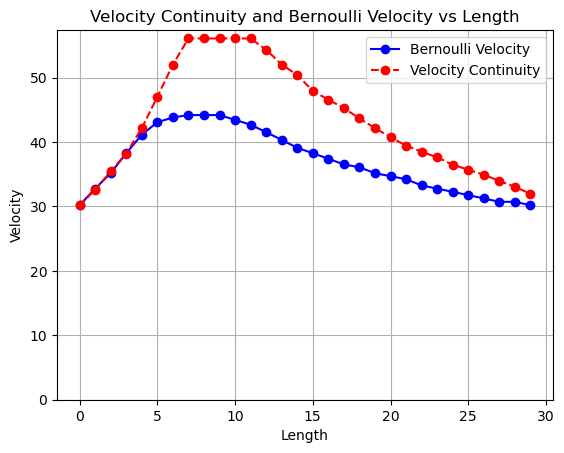

In [413]:
import matplotlib.pyplot as plt
plt.plot(df['Length'], df['Bernoulli Vel'], label='Bernoulli Velocity', marker='o', linestyle='-', color='b')
plt.plot(df['Length'], df['Velocity Continuity'], label='Velocity Continuity', marker='o', linestyle='--', color='r')
plt.title('Velocity Continuity and Bernoulli Velocity vs Length')
plt.xlabel('Length')
plt.ylabel('Velocity')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.savefig('Vel_vs_length.png', dpi=300)
plt.show()


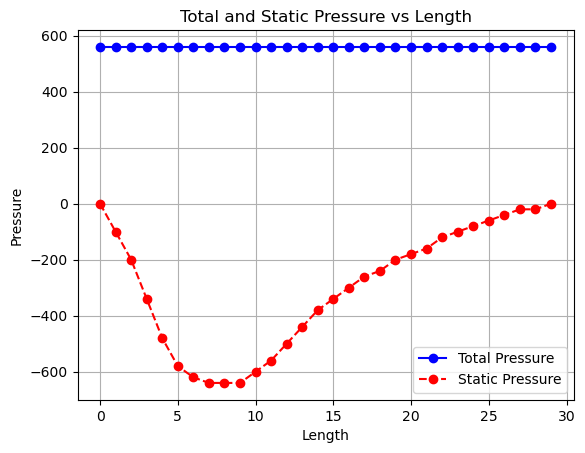

In [419]:
plt.plot(df['Length'], df['Total Pressure (Pa)'], label='Total Pressure', marker='o', linestyle='-', color='b')
plt.plot(df['Length'], df['Static Pressure (Pa)'], label='Static Pressure', marker='o', linestyle='--', color='r')
plt.title('Total and Static Pressure vs Length')
plt.xlabel('Length')
plt.ylabel('Pressure')
plt.legend()
plt.grid(True)
plt.savefig('pressure_vs_length.png', dpi=300)
plt.show()


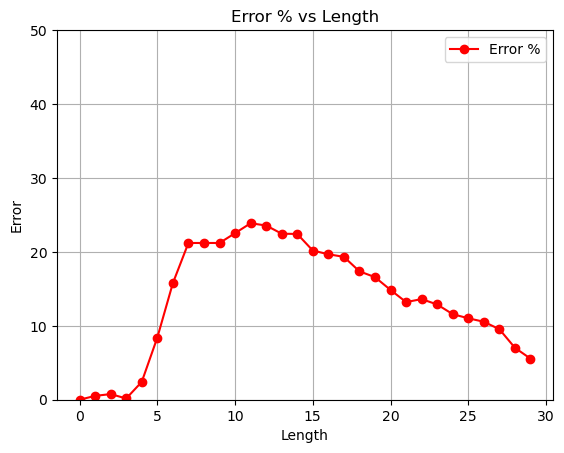

In [417]:
plt.plot(df['Length'], df['Error'], label='Error %', marker='o', linestyle='-', color='r')
plt.title('Error % vs Length')
plt.xlabel('Length')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.ylim(bottom=0,top = 50)
plt.savefig('Error_vs_length.png', dpi=300)
plt.show()


In [395]:
df.drop('A', axis=1, inplace=True) 

In [397]:
import dataframe_image as dfi
styled_df = df.style.set_table_styles(
    [
        {'selector': 'thead th', 'props': [('background-color', '#D3D3D3'), ('color', '#000000'), ('border', '1px solid black')]},
        {'selector': 'tbody td', 'props': [('background-color', '#FFFFFF'), ('color', '#333333'), ('border', '1px solid black')]},
        {'selector': 'tbody tr:nth-child(even) td', 'props': [('background-color', '#F2F2F2')]}
    ]
)
dfi.export(styled_df, 'Lab_02_dataframe.png')